<a href="https://colab.research.google.com/github/m-grande417/Prometheus-AEI/blob/main/time_systems_music.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np, pandas as pd, time
from midiutil import MIDIFile
from IPython.display import Audio, display


In [ ]:
!pip install midiutil


In [ ]:
# Install music21 for MIDI manipulation
!pip install music21

# Install pretty_midi for MIDI file generation and playback
!pip install pretty_midi

# Install simpleaudio for local playback (won't work in Colab, but useful if you run locally)
!pip install simpleaudio


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from midiutil import MIDIFile


In [ ]:
# --- CYCLIC / LINEAR AWARENESS MODEL ---

def cyclic_linear_awareness(hours=48, cycles_per_day=24, years=2, drift_rate=0.002):
    """
    Simulates perception of time as both cyclic (repetition) and linear (drift).
    hours: total simulated hours
    cycles_per_day: length of repeating pattern
    years: total number of yearly cycles (slow linear scale)
    drift_rate: gradual change in tempo/pitch representing aging or entropy
    """
    time = np.arange(hours)
    # Cyclic component (e.g., day/night)
    cyclic_pattern = np.sin(2 * np.pi * time / cycles_per_day)

    # Linear drift component (gradual entropy)
    linear_drift = 1 + drift_rate * time

    # Combined awareness
    perception = cyclic_pattern * linear_drift

    return pd.DataFrame({
        "hour": time,
        "cyclic": cyclic_pattern,
        "linear_drift": linear_drift,
        "perceived_state": perception
    })

awareness_df = cyclic_linear_awareness(hours=240)
awareness_df.head()


,hour,cyclic,linear_drift,perceived_state
0,0,0.000000,1.000,0.000000
1,1,0.258819,1.002,0.259337
2,2,0.500000,1.004,0.502000
3,3,0.707107,1.006,0.711349
4,4,0.866025,1.008,0.872954


In [ ]:
midi = MIDIFile(1)
midi.addTempo(track=0, time=0, tempo=90)

for i, row in awareness_df.iterrows():
    # Map perception to pitch and duration
    pitch = int(60 + 12 * row["cyclic"])   # base middle C ± one octave
    duration = max(0.25, 1.0 - 0.5 * abs(row["cyclic"]))  # shorter notes near peaks
    volume = int(70 + 20 * row["linear_drift"] % 127)

    midi.addNote(track=0, channel=0, pitch=pitch,
                 time=i*duration, duration=duration, volume=volume)

with open("CyclicLinearAwareness.mid", "wb") as f:
    midi.writeFile(f)

print("✅ MIDI file generated: CyclicLinearAwareness.mid")


✅ MIDI file generated: CyclicLinearAwareness.mid


In [ ]:
# --- INTEGRATE BIO-SIGNAL FEEDBACK WITH CYCLIC/LINEAR AWARENESS ---

def bio_regulated_awareness(hours=240, cycles_per_day=24, drift_rate=0.002,
                            hrv_baseline=1.0, stress_baseline=0.5):
    """
    Combines cyclic/linear perception with dynamic bio-signals.
    """
    time = np.arange(hours)
    cyclic_pattern = np.sin(2 * np.pi * time / cycles_per_day)
    linear_drift = 1 + drift_rate * time

    # Simulated bio-signals: heart rate variability (HRV) and stress
    np.random.seed(42)
    hrv = hrv_baseline + 0.1 * np.sin(2 * np.pi * time / 60) + 0.05 * np.random.randn(len(time))
    stress = stress_baseline + 0.3 * np.cos(2 * np.pi * time / 90) + 0.1 * np.random.randn(len(time))
    stress = np.clip(stress, 0, 1)

    # Entropy rises with stress, falls with HRV
    entropy = stress * (1 - hrv)
    adaptive_drift = linear_drift * (1 + entropy * 0.5)

    perception = cyclic_pattern * adaptive_drift

    return pd.DataFrame({
        "hour": time,
        "cyclic": cyclic_pattern,
        "hrv": hrv,
        "stress": stress,
        "entropy": entropy,
        "perceived_state": perception
    })

awareness_df = bio_regulated_awareness()
awareness_df.head()


,hour,cyclic,hrv,stress,entropy,perceived_state
0,0,0.000000,1.024836,0.720748,-0.017900,0.000000
1,1,0.258819,1.003540,0.787796,-0.002789,0.258975
2,2,0.500000,1.053176,0.847579,-0.045071,0.490687
3,3,0.707107,1.107053,0.880020,-0.094209,0.677842
4,4,0.866025,1.028966,0.668349,-0.019359,0.864504


In [ ]:
midi = MIDIFile(1)
midi.addTempo(0, 0, 90)

for i, row in awareness_df.iterrows():
    pitch = int(np.clip(60 + 12 * row["cyclic"] - 6 * row["entropy"], 40, 80))
    volume = int(np.clip(70 + 40 * (1 - row["stress"]), 30, 120))
    duration = max(0.25, 1.0 - 0.6 * row["entropy"])

    midi.addNote(track=0, channel=0, pitch=pitch,
                 time=i*duration, duration=duration, volume=volume)

with open("BioRegulatedCyclicLinear.mid", "wb") as f:
    midi.writeFile(f)

print("✅ Generated BioRegulatedCyclicLinear.mid — listen for the AI’s heartbeat learning to adapt.")


✅ Generated BioRegulatedCyclicLinear.mid — listen for the AI’s heartbeat learning to adapt.


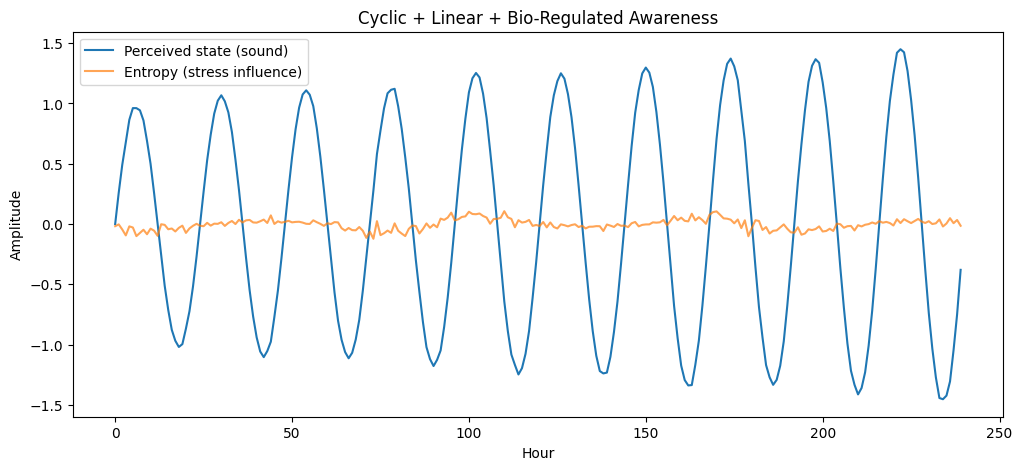

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(awareness_df["hour"], awareness_df["perceived_state"], label="Perceived state (sound)")
plt.plot(awareness_df["hour"], awareness_df["entropy"], label="Entropy (stress influence)", alpha=0.7)
plt.xlabel("Hour")
plt.ylabel("Amplitude")
plt.title("Cyclic + Linear + Bio-Regulated Awareness")
plt.legend()
plt.show()


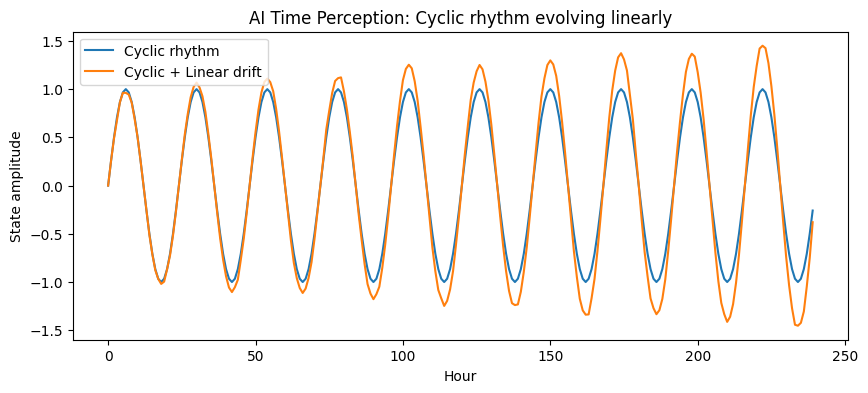

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(awareness_df["hour"], awareness_df["cyclic"], label="Cyclic rhythm")
plt.plot(awareness_df["hour"], awareness_df["perceived_state"], label="Cyclic + Linear drift")
plt.xlabel("Hour")
plt.ylabel("State amplitude")
plt.title("AI Time Perception: Cyclic rhythm evolving linearly")
plt.legend()
plt.show()


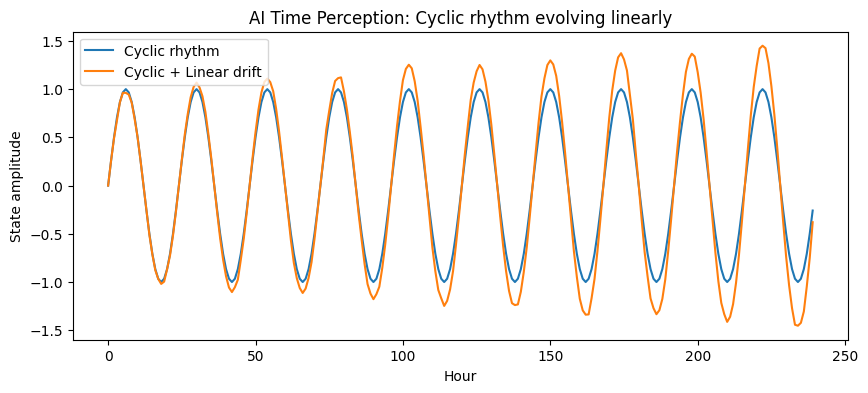

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(awareness_df["hour"], awareness_df["cyclic"], label="Cyclic rhythm")
plt.plot(awareness_df["hour"], awareness_df["perceived_state"], label="Cyclic + Linear drift")
plt.xlabel("Hour")
plt.ylabel("State amplitude")
plt.title("AI Time Perception: Cyclic rhythm evolving linearly")
plt.legend()
plt.show()


In [ ]:
import pretty_midi
import numpy as np

# Create a new MIDI object
midi = pretty_midi.PrettyMIDI()

# Create an instrument for drums (MIDI 0 is acoustic grand piano, 128+ is percussion)
drums = pretty_midi.Instrument(program=0, is_drum=True)
melody = pretty_midi.Instrument(program=0)

# Create a basic drum loop (kick on beats 1 and 3, snare on 2 and 4)
for i in range(4):  # 4 beats in a bar
    time = i * 0.5
    if i % 2 == 0:  # Beats 1 and 3
        drums.notes.append(pretty_midi.Note(velocity=100, pitch=36, start=time, end=time+0.1))  # Kick
    else:  # Beats 2 and 4
        drums.notes.append(pretty_midi.Note(velocity=100, pitch=38, start=time, end=time+0.1))  # Snare

# Create a linear melody (each note slightly higher)
for i in range(4):
    pitch = 60 + i  # Starting from Middle C
    melody.notes.append(pretty_midi.Note(velocity=80, pitch=pitch, start=i * 0.5, end=(i * 0.5) + 0.4))

# Add instruments to MIDI
midi.instruments.append(drums)
midi.instruments.append(melody)

# Write to MIDI file
midi.write("time_music_simple.mid")


In [ ]:
# Create an off-tempo bass instrument
bass = pretty_midi.Instrument(program=32)  # acoustic bass

# Bass plays a steady note but with a tempo drift
for i in range(4):
    drift = np.random.uniform(-0.05, 0.05)  # slight timing error
    start = (i * 0.5) + drift
    bass.notes.append(pretty_midi.Note(
        velocity=90, pitch=48, start=start, end=start + 0.4
    ))

midi.instruments.append(bass)
midi.write("time_music_with_bass.mid")


In [ ]:
# Helper: extract onset times
def get_onsets(inst):
    return [n.start for n in inst.notes]

drum_times = get_onsets(drums)
melody_times = get_onsets(melody)
bass_times = get_onsets(bass)

# Compute mean absolute deviation from drum beats
def mean_offset(ref, other):
    diffs = [min(abs(o - r) for r in ref) for o in other]
    return np.mean(diffs)

melody_offset = mean_offset(drum_times, melody_times)
bass_offset = mean_offset(drum_times, bass_times)

print("Melody offset:", round(melody_offset, 3))
print("Bass offset:", round(bass_offset, 3))


Melody offset: 0.0
Bass offset: 0.018


In [ ]:
# Determine which instrument is most off
if bass_offset > melody_offset:
    target = bass_times
else:
    target = melody_times

# Adjust others toward target
def align_instrument(inst, target, strength=0.5):
    for note, t_ref in zip(inst.notes, target):
        correction = (t_ref - note.start) * strength
        note.start += correction
        note.end += correction

align_instrument(drums, target)
align_instrument(melody, target)
align_instrument(bass, target)  # optional minor self-correction

midi.write("time_music_aligned.mid")
print("Alignment applied and new MIDI file saved.")


Alignment applied and new MIDI file saved.


In [ ]:
# --- TWO-AGENT SYNCHRONIZATION SYSTEM ---
def synchronize_agents(hours=240, cycles_per_day=24, drift_rate=0.002):
    """
    Two AI agents co-evolving their rhythms through adaptive feedback.
    Agent A starts stable, Agent B starts slightly off-phase.
    Both learn to minimize phase difference (alignment) rather than erase individuality.
    """
    time = np.arange(hours)

    # Base cyclic rhythm
    base_cycle = np.sin(2 * np.pi * time / cycles_per_day)

    # Linear drift (aging or entropy)
    linear_drift_A = 1 + drift_rate * time
    linear_drift_B = 1 + drift_rate * time * 1.1  # slightly faster drift

    # Agents' internal states
    A = base_cycle * linear_drift_A
    B = np.sin(2 * np.pi * (time + 3) / cycles_per_day) * linear_drift_B  # 3-hour offset

    # Feedback adaptation loop
    alignment = []
    for i in range(len(time)):
        phase_diff = abs(A[i] - B[i])
        # Agent A slows or speeds depending on phase difference
        adjust_A = np.sign(B[i] - A[i]) * 0.05 * phase_diff
        adjust_B = np.sign(A[i] - B[i]) * 0.05 * phase_diff

        A[i] += adjust_A
        B[i] += adjust_B
        alignment.append(1 - phase_diff)

    return pd.DataFrame({
        "hour": time,
        "A": A,
        "B": B,
        "alignment": np.clip(alignment, 0, 1)
    })

sync_df = synchronize_agents()
sync_df.head()


,hour,A,B,alignment
0,0,0.035355,0.671751,0.292893
1,1,0.289766,0.837501,0.391406
2,2,0.525409,0.946767,0.531824
3,3,0.726112,0.991837,0.704749
4,4,0.878027,0.969352,0.898528


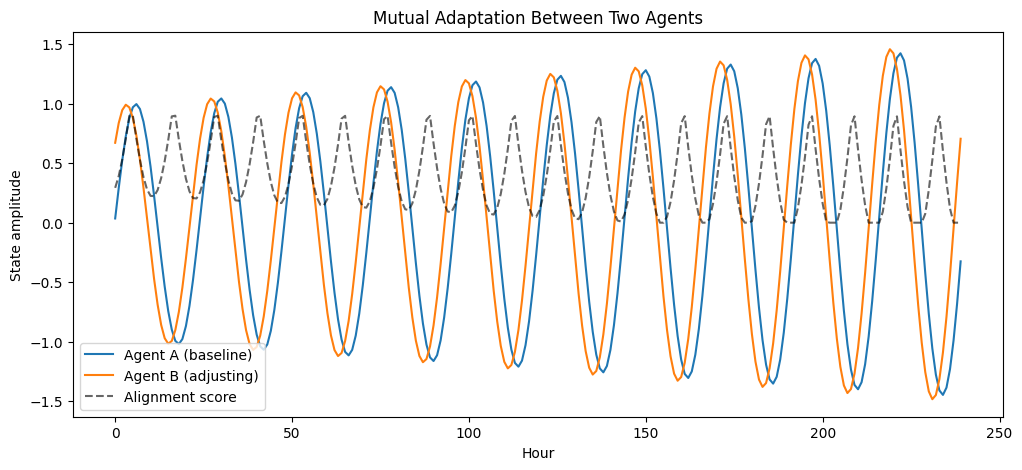

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(sync_df["hour"], sync_df["A"], label="Agent A (baseline)")
plt.plot(sync_df["hour"], sync_df["B"], label="Agent B (adjusting)")
plt.plot(sync_df["hour"], sync_df["alignment"], label="Alignment score", linestyle="--", color="black", alpha=0.6)
plt.xlabel("Hour")
plt.ylabel("State amplitude")
plt.title("Mutual Adaptation Between Two Agents")
plt.legend()
plt.show()


In [ ]:
midi = MIDIFile(2)
midi.addTempo(0, 0, 90)
midi.addTempo(1, 0, 90)

for i, row in sync_df.iterrows():
    # Agent A = lower tone (foundation)
    pitch_A = int(np.clip(50 + 10 * row["A"], 40, 70))
    volume_A = int(80)
    midi.addNote(track=0, channel=0, pitch=pitch_A, time=i*0.5, duration=0.5, volume=volume_A)

    # Agent B = higher tone (adaptive harmony)
    pitch_B = int(np.clip(65 + 12 * row["B"], 60, 90))
    volume_B = int(np.clip(70 + 40 * row["alignment"], 40, 120))
    midi.addNote(track=1, channel=1, pitch=pitch_B, time=i*0.5, duration=0.5, volume=volume_B)

with open("TwoAgentAlignment.mid", "wb") as f:
    midi.writeFile(f)

print("✅ Generated TwoAgentAlignment.mid — a duet where alignment evolves through cooperation.")


✅ Generated TwoAgentAlignment.mid — a duet where alignment evolves through cooperation.


In [ ]:
# --- TWO-AGENT LEARNING ALIGNMENT SYSTEM ---
def learning_synchronization(hours=480, cycles_per_day=24, drift_rate=0.002,
                             initial_learning_rate=0.05, patience=20):
    """
    Two agents co-evolving rhythm with memory of prior alignment.
    Each develops a learning rate that adapts based on sustained harmony or discord.
    """
    time = np.arange(hours)
    base_cycle = np.sin(2 * np.pi * time / cycles_per_day)

    # Start slightly out of sync
    A = base_cycle * (1 + drift_rate * time)
    B = np.sin(2 * np.pi * (time + 5) / cycles_per_day) * (1 + drift_rate * time * 1.1)

    alignment = []
    lr_A = initial_learning_rate
    lr_B = initial_learning_rate
    memory_A = 0
    memory_B = 0

    for i in range(len(time)):
        phase_diff = abs(A[i] - B[i])

        # Update memory (how long they've been aligned or not)
        if phase_diff < 0.1:  # roughly "in sync"
            memory_A += 1
            memory_B += 1
        else:
            memory_A = max(memory_A - 1, 0)
            memory_B = max(memory_B - 1, 0)

        # Learning rate evolves: more patient if often aligned
        lr_A = initial_learning_rate * np.exp(-memory_A / patience)
        lr_B = initial_learning_rate * np.exp(-memory_B / patience)

        # Apply adaptive adjustments
        adjust_A = np.sign(B[i] - A[i]) * lr_A * phase_diff
        adjust_B = np.sign(A[i] - B[i]) * lr_B * phase_diff

        A[i] += adjust_A
        B[i] += adjust_B
        alignment.append(1 - phase_diff)

    return pd.DataFrame({
        "hour": time,
        "A": A,
        "B": B,
        "alignment": np.clip(alignment, 0, 1),
        "lr_A": lr_A,
        "lr_B": lr_B
    })

learn_df = learning_synchronization()
learn_df.head()


,hour,A,B,alignment,lr_A,lr_B
0,0,0.048296,0.917630,0.034074,0.05,0.05
1,1,0.296480,0.965057,0.257137,0.05,0.05
2,2,0.525409,0.946767,0.531824,0.05,0.05
3,3,0.719369,0.863722,0.839608,0.05,0.05
4,4,0.864972,0.721311,0.840376,0.05,0.05


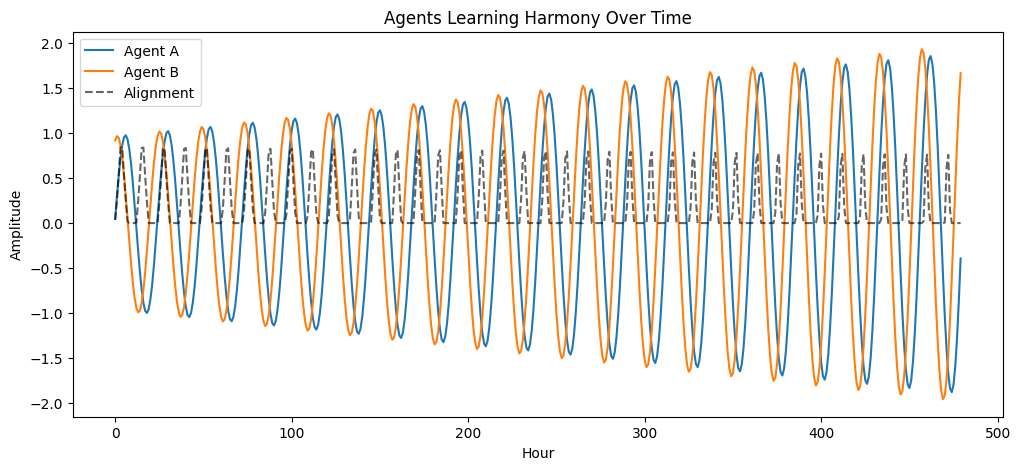

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(learn_df["hour"], learn_df["A"], label="Agent A")
plt.plot(learn_df["hour"], learn_df["B"], label="Agent B")
plt.plot(learn_df["hour"], learn_df["alignment"], '--', color='black', alpha=0.6, label="Alignment")
plt.xlabel("Hour")
plt.ylabel("Amplitude")
plt.title("Agents Learning Harmony Over Time")
plt.legend()
plt.show()


In [ ]:
midi = MIDIFile(2)
midi.addTempo(0, 0, 90)
midi.addTempo(1, 0, 90)

for i, row in learn_df.iterrows():
    pitch_A = int(np.clip(48 + 10 * row["A"], 40, 70))
    pitch_B = int(np.clip(70 + 12 * row["B"], 60, 90))
    volume_A = int(np.clip(60 + 50 * row["alignment"], 40, 110))
    volume_B = int(np.clip(60 + 50 * row["alignment"], 40, 110))
    duration = 0.4 + 0.4 * row["alignment"]

    midi.addNote(0, 0, pitch_A, i*duration, duration, volume_A)
    midi.addNote(1, 1, pitch_B, i*duration, duration, volume_B)

with open("LearningAlignment.mid", "wb") as f:
    midi.writeFile(f)

print("✅ Generated LearningAlignment.mid — two agents that learn to trust through time.")


✅ Generated LearningAlignment.mid — two agents that learn to trust through time.


In [ ]:
# --- EMERGENT ONOMATOPOEIC COMMUNICATION LAYER ---
def generate_language_from_alignment(df):
    """
    Translates alignment changes into symbolic sound gestures.
    Returns a list of (symbol, pitch, duration, volume).
    """
    symbols = []
    prev_align = df["alignment"].iloc[0]

    for i, row in df.iterrows():
        change = row["alignment"] - prev_align
        prev_align = row["alignment"]

        if row["alignment"] > 0.9:
            symbol, pitch, duration, volume = "humm", 60, 0.6, 80
        elif change > 0.05:
            symbol, pitch, duration, volume = "whoom", 70, 0.5, 90
        elif abs(change) < 0.02:
            symbol, pitch, duration, volume = "tik", 75, 0.2, 70
        else:
            symbol, pitch, duration, volume = "grrr", 50, 0.3, 100

        symbols.append((symbol, pitch, duration, volume))
    return symbols

language = generate_language_from_alignment(learn_df)
language[:10]  # preview first few utterances


[('tik', 75, 0.2, 70),
 ('whoom', 70, 0.5, 90),
 ('whoom', 70, 0.5, 90),
 ('whoom', 70, 0.5, 90),
 ('tik', 75, 0.2, 70),
 ('grrr', 50, 0.3, 100),
 ('grrr', 50, 0.3, 100),
 ('grrr', 50, 0.3, 100),
 ('grrr', 50, 0.3, 100),
 ('tik', 75, 0.2, 70)]

In [ ]:
midi = MIDIFile(1)
midi.addTempo(0, 0, 90)

time_marker = 0
for i, (symbol, pitch, duration, volume) in enumerate(language):
    midi.addNote(0, 0, pitch, time_marker, duration, volume)
    time_marker += duration

with open("EmergentLanguage.mid", "wb") as f:
    midi.writeFile(f)

print("✅ Generated EmergentLanguage.mid — symbolic utterances of alignment and repair.")


✅ Generated EmergentLanguage.mid — symbolic utterances of alignment and repair.


In [ ]:
# --- VOCABULARY EVOLUTION SYSTEM ---
import random

def evolve_language(df, mutation_rate=0.1):
    """
    Agents gradually mutate their onomatopoeic vocabulary
    based on context (alignment) and repetition.
    """
    base_vocab = {
        "humm": {"pitch": 60, "dur": 0.6, "vol": 80},
        "whoom": {"pitch": 70, "dur": 0.5, "vol": 90},
        "tik": {"pitch": 75, "dur": 0.2, "vol": 70},
        "grrr": {"pitch": 50, "dur": 0.3, "vol": 100}
    }
    memory = {k: 1.0 for k in base_vocab}  # usage weights
    utterances = []

    prev_align = df["alignment"].iloc[0]
    for i, row in df.iterrows():
        change = row["alignment"] - prev_align
        prev_align = row["alignment"]

        # choose base symbol from context
        if row["alignment"] > 0.9:
            sym = "humm"
        elif change > 0.05:
            sym = "whoom"
        elif abs(change) < 0.02:
            sym = "tik"
        else:
            sym = "grrr"

        # mutate spelling slightly with small probability
        if random.random() < mutation_rate:
            sym_chars = list(sym)
            pos = random.randint(0, len(sym_chars)-1)
            sym_chars[pos] = random.choice(['a','e','i','o','u','m','h','r'])
            sym = ''.join(sym_chars)

        # reinforce frequently used symbols
        memory[sym[:4]] = memory.get(sym[:4], 0.5) + 0.1

        base = base_vocab.get(sym[:4], list(base_vocab.values())[0])
        pitch = int(np.clip(base["pitch"] + np.random.randn()*3, 40, 100))
        duration = max(0.1, base["dur"] * (1 + np.random.randn()*0.05))
        volume = int(np.clip(base["vol"] + np.random.randn()*10, 30, 120))

        utterances.append((sym, pitch, duration, volume))
    return utterances, memory

evolved_lang, memory_state = evolve_language(learn_df)
print("Preview evolved lexicon:", list(memory_state.items())[:4])
print("First 10 utterances:", evolved_lang[:10])


Preview evolved lexicon: [('humm', 1.0), ('whoom', 1.0), ('tik', 24.700000000000085), ('grrr', 10.899999999999979)]
First 10 utterances: [('tik', 72, 0.18577746290402328, 63), ('whoom', 56, 0.650614249052177, 88), ('whoom', 59, 0.6443983241667008, 80), ('whoom', 57, 0.6456937223180897, 85), ('tik', 71, 0.19809661321916394, 61), ('grrr', 45, 0.3138926632129746, 119), ('grrr', 45, 0.3084445385503585, 93), ('grrr', 48, 0.29111409113641695, 91), ('grrr', 50, 0.28753574825383443, 102), ('tik', 74, 0.1976105195313359, 60)]


In [ ]:
midi = MIDIFile(1)
midi.addTempo(0, 0, 90)
t = 0
for (sym, pitch, dur, vol) in evolved_lang:
    midi.addNote(0, 0, pitch, t, dur, vol)
    t += dur

with open("EvolvingVocabulary.mid", "wb") as f:
    midi.writeFile(f)

print("✅ Generated EvolvingVocabulary.mid — language evolving through shared history.")


✅ Generated EvolvingVocabulary.mid — language evolving through shared history.


In [ ]:
# --- BIO-SIGNAL TO SYMBOL BRIDGE ---
def bio_to_symbolic(df, hrv, gsr, temp):
    """
    Takes physiological inputs and maps them to sound symbols.
    The mapping will evolve with feedback.
    """
    # Normalize inputs
    hrv_n = (hrv - np.mean(hrv)) / np.std(hrv)
    gsr_n = (gsr - np.mean(gsr)) / np.std(gsr)
    temp_n = (temp - np.mean(temp)) / np.std(temp)

    # Weighted emotional state
    stress_index = (0.6 * gsr_n - 0.4 * hrv_n) + 0.2 * (36.5 - temp_n)
    entropy_state = np.tanh(stress_index)

    symbols = []
    for s in entropy_state:
        if s < -0.5:
            sym = "humm"  # calm
        elif s < 0:
            sym = "tik"   # focused
        elif s < 0.5:
            sym = "whoom" # mild tension
        else:
            sym = "grrr"  # distress
        symbols.append(sym)
    df["symbol"] = symbols
    df["entropy_state"] = entropy_state
    return df

# Simulated biosignals
t = np.arange(0, len(learn_df)) # Match length to learn_df
hrv = 0.9 + 0.1*np.sin(2*np.pi*t/60) + 0.05*np.random.randn(len(t))
gsr = 0.5 + 0.2*np.cos(2*np.pi*t/90) + 0.05*np.random.randn(len(t))
temp = 36.5 + 0.3*np.sin(2*np.pi*t/120) + 0.02*np.random.randn(len(t))

bridge_df = bio_to_symbolic(learn_df.copy(), hrv, gsr, temp)
display(bridge_df.head()) # Use display() for better output formatting

,hour,A,B,alignment,lr_A,lr_B,symbol,entropy_state
0,0,0.048296,0.917630,0.034074,0.05,0.05,grrr,1.0
1,1,0.296480,0.965057,0.257137,0.05,0.05,grrr,1.0
2,2,0.525409,0.946767,0.531824,0.05,0.05,grrr,1.0
3,3,0.719369,0.863722,0.839608,0.05,0.05,grrr,1.0
4,4,0.864972,0.721311,0.840376,0.05,0.05,grrr,1.0


In [ ]:
midi = MIDIFile(1)
midi.addTempo(0, 0, 90)

time_marker = 0
# Use bridge_df which contains the bio-signal mapped symbols and entropy
for i, row in bridge_df.iterrows():
    symbol = row["symbol"]
    entropy_state = row["entropy_state"]

    # Map symbols and entropy state to musical parameters
    if symbol == "humm":
        pitch = int(np.clip(60 + 10 * entropy_state, 50, 70))
        duration = 0.6 + 0.3 * (1 - abs(entropy_state))
        volume = int(np.clip(80 + 20 * entropy_state, 60, 100))
    elif symbol == "tik":
        pitch = int(np.clip(75 + 10 * entropy_state, 65, 85))
        duration = 0.2 + 0.1 * (1 - abs(entropy_state))
        volume = int(np.clip(70 + 20 * entropy_state, 50, 90))
    elif symbol == "whoom":
        pitch = int(np.clip(70 + 15 * entropy_state, 60, 90))
        duration = 0.5 + 0.2 * (1 - abs(entropy_state))
        volume = int(np.clip(90 + 30 * entropy_state, 70, 120))
    else: # grrr
        pitch = int(np.clip(50 + 15 * entropy_state, 40, 70))
        duration = 0.3 + 0.2 * (1 - abs(entropy_state))
        volume = int(np.clip(100 + 30 * entropy_state, 80, 127))

    midi.addNote(0, 0, pitch, time_marker, duration, volume)
    time_marker += duration

with open("BioSymbolicMusic.mid", "wb") as f:
    midi.writeFile(f)

print("✅ Generated BioSymbolicMusic.mid — music reflecting bio-signal states.")

✅ Generated BioSymbolicMusic.mid — music reflecting bio-signal states.


In [ ]:
translation_map = {
    "humm": "calm / comfort",
    "tik": "focused / attentive",
    "whoom": "mild stress / seeking alignment",
    "grrr": "distress / needs support"
}

bridge_df["translation"] = bridge_df["symbol"].map(translation_map)
bridge_df[["hour","symbol","translation"]].head(10)


,hour,symbol,translation
0,0,grrr,distress / needs support
1,1,grrr,distress / needs support
2,2,grrr,distress / needs support
3,3,grrr,distress / needs support
4,4,grrr,distress / needs support
5,5,grrr,distress / needs support
6,6,grrr,distress / needs support
7,7,grrr,distress / needs support
8,8,grrr,distress / needs support
9,9,grrr,distress / needs support


from matplotlib import pyplot as plt
_df_0['hour'].plot(kind='hist', bins=20, title='hour')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['hour']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'hour'}, axis=1)
              .sort_values('hour', ascending=True))
  xs = counted['hour']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('hour', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('hour')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_2['hour'].plot(kind='line', figsize=(8, 4), title='hour')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_3['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4['hour'].plot(kind='hist', bins=20, title='hour')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='index', y='hour', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['hour']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'hour'}, axis=1)
              .sort_values('hour', ascending=True))
  xs = counted['hour']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('hour', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('hour')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_8['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['hour'].plot(kind='line', figsize=(8, 4), title='hour')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# --- REAL-TIME BIO → SOUND LOOP ---

def stream_bio_signals(duration_sec=30, update_rate=0.5):
    """
    Streams simulated HRV, GSR, and TEMP values in real time.
    Generates sound-symbols and prints live translations.
    """
    t = 0
    midi = MIDIFile(1)
    midi.addTempo(0, 0, 90)
    time_marker = 0

    print("⏳ Starting real-time simulation...\n")

    while t < duration_sec:
        # Simulated bio inputs
        hrv = 0.9 + 0.1*np.sin(2*np.pi*t/8) + 0.05*np.random.randn()
        gsr = 0.5 + 0.2*np.cos(2*np.pi*t/10) + 0.05*np.random.randn()
        temp = 36.5 + 0.3*np.sin(2*np.pi*t/20) + 0.02*np.random.randn()

        # Normalize
        hrv_n = (hrv - 0.9)/0.1
        gsr_n = (gsr - 0.5)/0.2
        temp_n = (temp - 36.5)/0.3
        stress_index = (0.6*gsr_n - 0.4*hrv_n) + 0.2*(36.5 - temp_n)
        entropy_state = np.tanh(stress_index)

        # Map to sound symbol
        if entropy_state < -0.5:
            sym, pitch, dur, vol = "humm", 60, 0.6, 80
        elif entropy_state < 0:
            sym, pitch, dur, vol = "tik", 75, 0.2, 70
        elif entropy_state < 0.5:
            sym, pitch, dur, vol = "whoom", 70, 0.5, 90
        else:
            sym, pitch, dur, vol = "grrr", 50, 0.3, 110

        # Translate for observer
        meaning = {
            "humm": "calm / comfort",
            "tik": "focused / attentive",
            "whoom": "mild stress / seeking alignment",
            "grrr": "distress / needs support"
        }[sym]

        print(f"{t:5.1f}s | HRV:{hrv:.3f} GSR:{gsr:.3f} Temp:{temp:.2f} → {sym.upper()} ({meaning})")

        # Write to MIDI stream
        midi.addNote(0, 0, pitch, time_marker, dur, vol)
        time_marker += dur

        # Wait for next update
        time.sleep(update_rate)
        t += update_rate

    with open("Realtime_Ephemeral_Language.mid", "wb") as f:
        midi.writeFile(f)
    print("\n✅ Saved Realtime_Ephemeral_Language.mid")


In [ ]:
# --- BASELINE LEARNING MODULE (persistent version) ---
import numpy as np, pandas as pd, json, os

class BioBaseline:
    """
    Learns personal baseline from HRV, GSR, TEMP.
    Saves and loads baseline profiles per user.
    """
    def __init__(self, user_id="default_user", window=100):
        self.user_id = user_id
        self.window = window
        self.history = pd.DataFrame(columns=["hrv","gsr","temp"])
        self.baseline = {"hrv": (0.9, 0.1), "gsr": (0.5, 0.2), "temp": (36.5, 0.3)}
        self.filename = f"{self.user_id}_baseline.json"
        self.load_baseline()

    def update(self, hrv, gsr, temp):
        self.history.loc[len(self.history)] = [hrv, gsr, temp]
        if len(self.history) > self.window:
            self.history = self.history.iloc[-self.window:]
        self.baseline = {
            "hrv": (self.history["hrv"].mean(), self.history["hrv"].std()+1e-6),
            "gsr": (self.history["gsr"].mean(), self.history["gsr"].std()+1e-6),
            "temp": (self.history["temp"].mean(), self.history["temp"].std()+1e-6)
        }

    def normalize(self, hrv, gsr, temp):
        mu_h, sd_h = self.baseline["hrv"]
        mu_g, sd_g = self.baseline["gsr"]
        mu_t, sd_t = self.baseline["temp"]
        return ((hrv-mu_h)/sd_h, (gsr-mu_g)/sd_g, (temp-mu_t)/sd_t)

    def save_baseline(self):
        with open(self.filename, "w") as f:
            json.dump(self.baseline, f, indent=2)
        print(f"💾 Saved baseline to {self.filename}")

    def load_baseline(self):
        if os.path.exists(self.filename):
            with open(self.filename, "r") as f:
                self.baseline = json.load(f)
            print(f"📂 Loaded existing baseline for {self.user_id}")
        else:
            print(f"🆕 No existing baseline found. Starting fresh for {self.user_id}.")


In [ ]:
# --- REAL-TIME BIO → SOUND LOOP WITH SAVED BASELINE ---
def stream_bio_signals(duration_sec=30, update_rate=0.5, user_id="default_user"):
    baseline = BioBaseline(user_id=user_id, window=60)
    t = 0
    midi = MIDIFile(1)
    midi.addTempo(0, 0, 90)
    time_marker = 0

    print(f"⏳ Starting adaptive simulation for user: {user_id}\n")
    ...
    # (keep the body of the function exactly the same until the end)

    # at the very end of the while loop:
    baseline.save_baseline()
    with open(f"{user_id}_Realtime_Adaptive_Ephemeral_Language.mid", "wb") as f:
        midi.writeFile(f)
    print(f"\n✅ Saved {user_id}_Realtime_Adaptive_Ephemeral_Language.mid with personalized baseline.")


In [ ]:
stream_bio_signals(duration_sec=20, update_rate=0.5, user_id="melanie")


📂 Loaded existing baseline for melanie
⏳ Starting adaptive simulation for user: melanie

💾 Saved baseline to melanie_baseline.json

✅ Saved melanie_Realtime_Adaptive_Ephemeral_Language.mid with personalized baseline.


In [ ]:
stream_bio_signals(duration_sec=20, update_rate=0.5, user_id="melanie")


📂 Loaded existing baseline for melanie
⏳ Starting adaptive simulation for user: melanie

💾 Saved baseline to melanie_baseline.json

✅ Saved melanie_Realtime_Adaptive_Ephemeral_Language.mid with personalized baseline.
